In [1]:
import pandas as pd
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()

[2024-08-30 14:21:42,757][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-08-30 14:21:43,127][log.log][INFO] Query execution time: 0.16304445266723633 seconds.


# 乖離率 (BIAS)
## $$Bias=\frac{P-MA}{MA}$$

<Axes: xlabel='Date'>

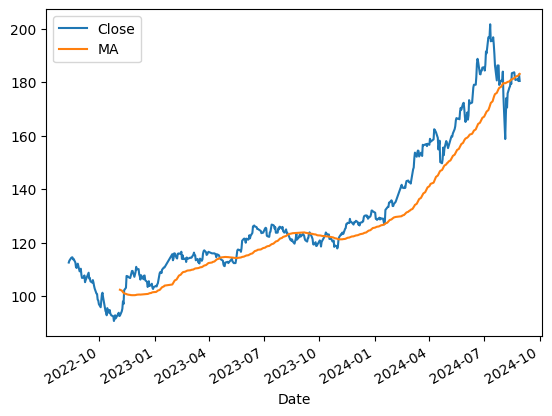

In [3]:
df["MA"] = df['Close'].rolling(60).mean()
df.plot()

In [10]:
MA=60
Threshold=0.1
hold_period=40

In [6]:
df['Bias']=df['Close']/df['MA']-1
df['temp']=df['Close'].pct_change(hold_period)
df['return']=list(df['temp'].dropna())+[None]*(len(df)-len(df['temp'].dropna()))
df.dropna(inplace=True)
df

,Close,MA,Bias,temp,return
Date,,,,,
2022-11-04,92.6377,102.331743,-0.094732,-0.118986,0.114816
2022-11-07,94.2308,102.027173,-0.076415,-0.110174,0.101445
2022-11-08,95.2148,101.727287,-0.064019,-0.119588,0.087594
2022-11-09,97.9326,101.455513,-0.034724,-0.099139,0.065069
2022-11-10,96.9954,101.165003,-0.041216,-0.089313,0.080196
...,...,...,...,...,...
2024-06-28,185.5020,166.694883,0.112824,0.194045,-0.024539
2024-07-01,185.6510,167.141767,0.110740,0.188912,-0.023706
2024-07-02,184.4080,167.586167,0.100377,0.164258,-0.021463


In [11]:
result=df[(df['Bias']<Threshold)]
result

,Close,MA,Bias,temp,return
Date,,,,,
2022-11-04,92.6377,102.331743,-0.094732,-0.118986,0.114816
2022-11-07,94.2308,102.027173,-0.076415,-0.110174,0.101445
2022-11-08,95.2148,101.727287,-0.064019,-0.119588,0.087594
2022-11-09,97.9326,101.455513,-0.034724,-0.099139,0.065069
2022-11-10,96.9954,101.165003,-0.041216,-0.089313,0.080196
...,...,...,...,...,...
2024-06-05,167.5940,159.761183,0.049028,0.031856,0.097891
2024-06-06,173.3140,160.114367,0.082439,0.068711,0.007997
2024-06-07,171.9710,160.418633,0.072014,0.063690,-0.076879


In [12]:
print('出現次數: ', len(result))
print('平均報酬率: ',result['return'].mean()*100)
print('勝率: ', len(result[result['return']>0])/len(result))
print('最大損失: ',result['return'].min())

出現次數:  355
平均報酬率:  6.245524396501387
勝率:  0.7746478873239436
最大損失:  -0.07687924126742307
